# Log metric

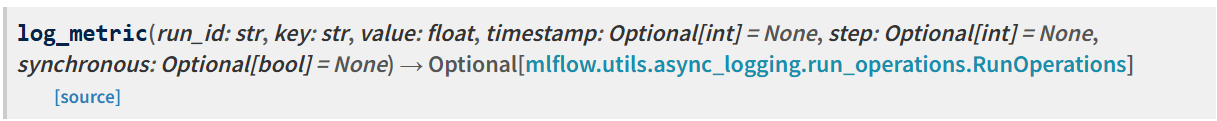

In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

## Log a single metric

In [ ]:
# starting a run.

with mlflow.start_run(run_name="logging_metrics") as run:
    mlflow.log_metric("m1", 2.0)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()


## Log multiple metrics

In [ ]:
#starting a run

metrics = {
    "m1": 2.0,
    "m2": 3.0,
    "m3": 4.0
}
with mlflow.start_run(run_name="logging_metrics") as run:
    mlflow.log_metrics(metrics)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

## Log metric providing a run id

In [ ]:
client = mlflow.MlflowClient()

#create a run
run = client.create_run(experiment_id="0",run_name="logging_metrics")
run_id = run.info.run_id

# log a metric
mlflow.log_metric(key="m1", value=1.0, run_id=run_id)

# log multiple metrics
metrics = {
    "m2": 2.0,
    "m3": 3.0
}
mlflow.log_metrics(metrics, run_id=run_id)


# end the run
client.set_terminated(run_id, status="FINISHED")

In [ ]:
# check the run data
run = mlflow.get_run(run_id)

print("run_id: {}".format(run.info.run_id))
print("status: {}".format(run.info.status))
run.data.to_dictionary()

# Log a Parameter

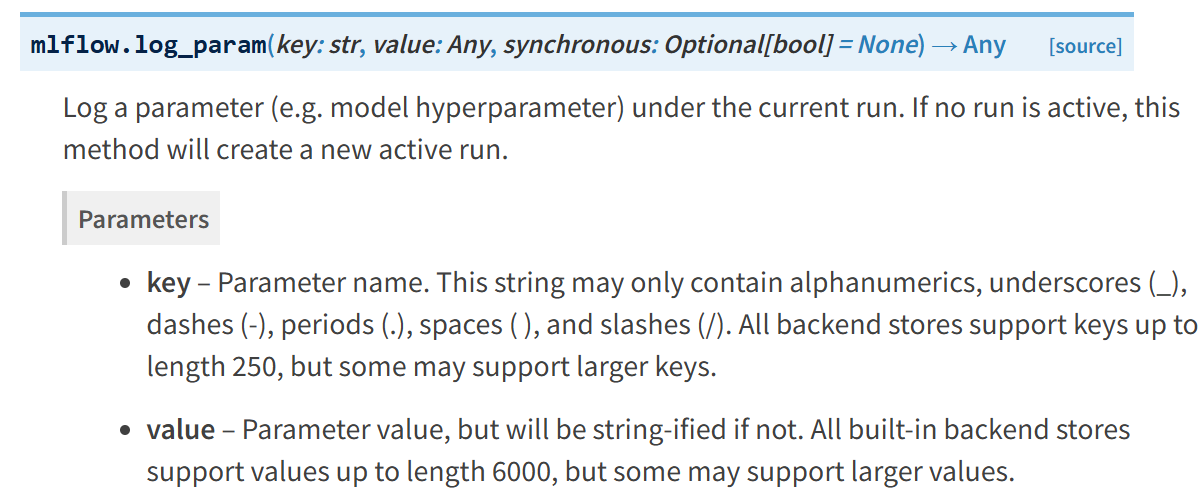

## Log a single parameter

In [ ]:
# starting a run.
with mlflow.start_run(run_name="logging_parameters") as run:
    mlflow.log_param("p1", 1)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

## Log multiple parameters
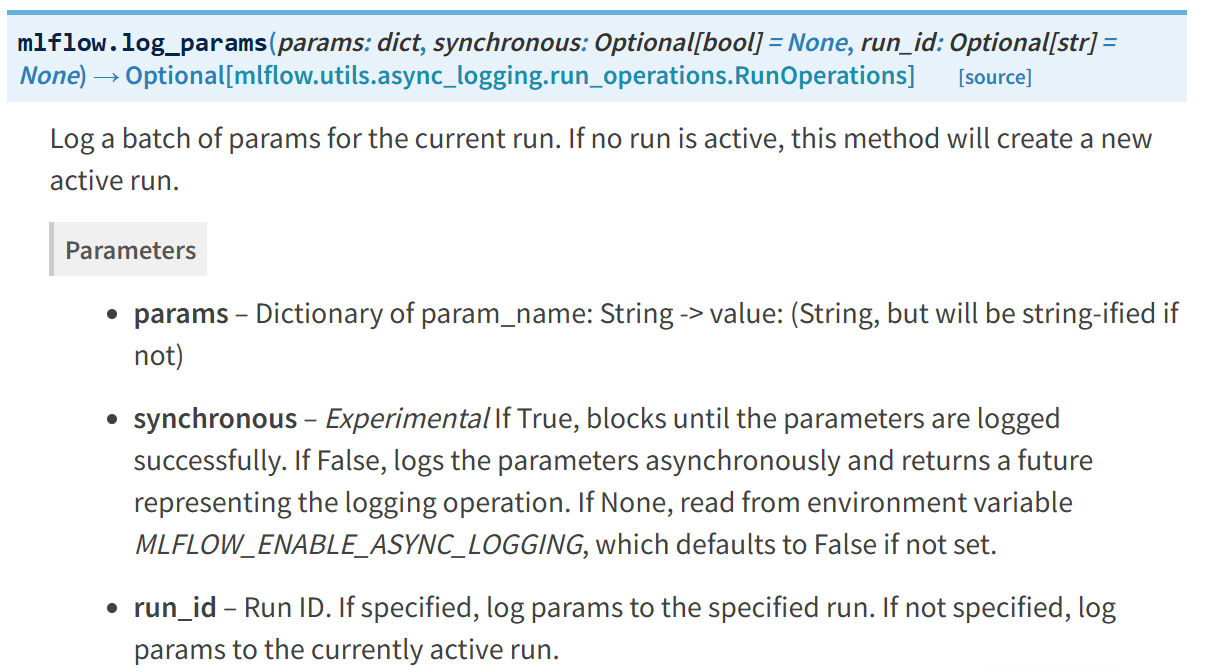

In [ ]:
parameters = {
    "p1": 1,
    "p2": 2,
    "p3": 3
}
with mlflow.start_run(run_name="logging_parameters") as run:
    mlflow.log_params(parameters)
    
# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

## Log parameters providing run id

In [ ]:
client = mlflow.MlflowClient()

#create a run
run = client.create_run(experiment_id="0", run_name="logging_parameters")
run_id = run.info.run_id

# log a parameter
# mlflow.log_param does not accept run_id as an argument
try:
    mlflow.log_param(key="p1", value="some value", run_id=run_id)
except Exception as e:
    print("ERROR:", e)

In [ ]:
# Unlike log_param, log_params accepts run_id as an argument
mlflow.log_params(parameters, run_id=run_id)

# Retrieve the run data
run = mlflow.get_run(run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

In [ ]:
# end the run
client.set_terminated(run_id, status="FINISHED")

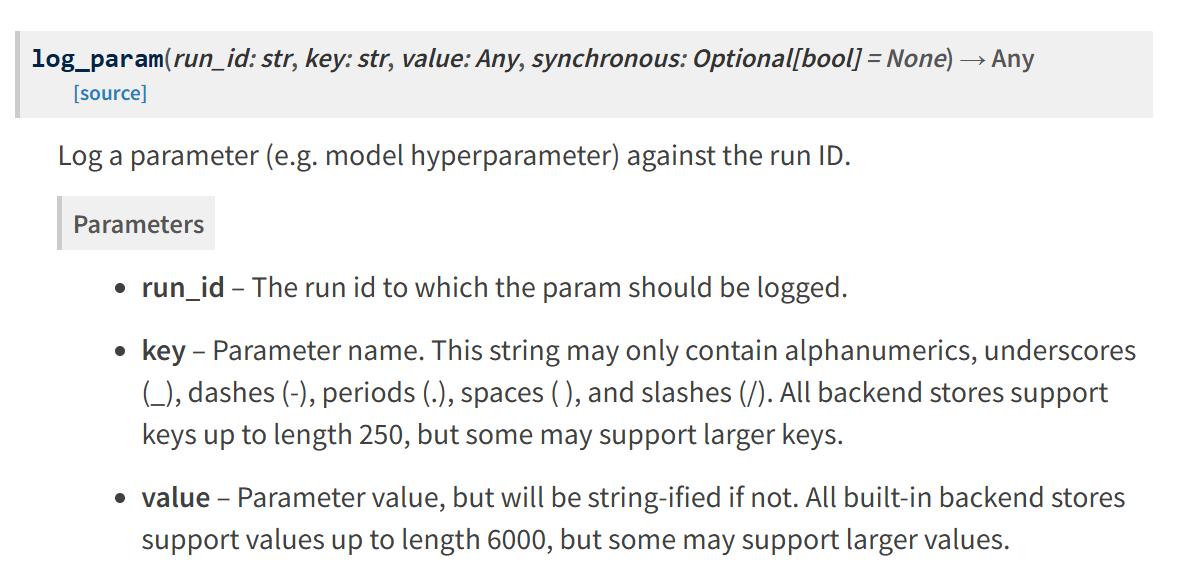

In [ ]:
run = client.create_run(experiment_id="0", run_name="logging_parameters")
run_id = run.info.run_id

# using client to log a parameter providing the run_id
client.log_param(run_id, "p1", "some value")

# log multiple parameters
parameters = {
    "p2": 2.0,
    "p3": "param 3"
}
mlflow.log_params(parameters, run_id=run_id)


# end the run
client.set_terminated(run_id, status="FINISHED")

In [ ]:
# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

## Log a single artifact

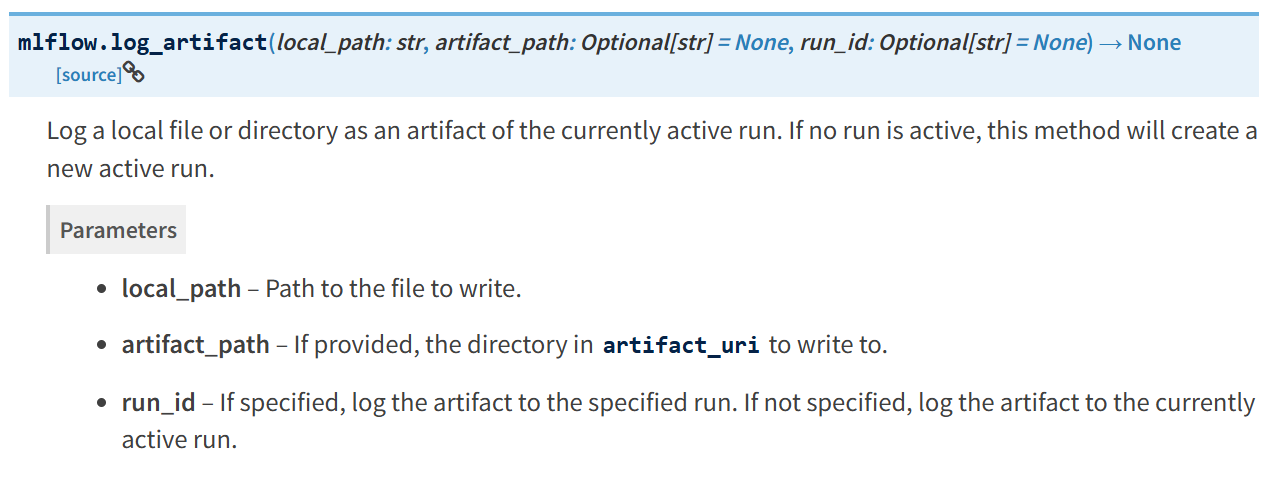

In [ ]:
from pathlib import Path 

path = Path("artifacts_example/predictions.csv")

In [ ]:
# starting a run.
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifact(path)

## Log multiple artifacts

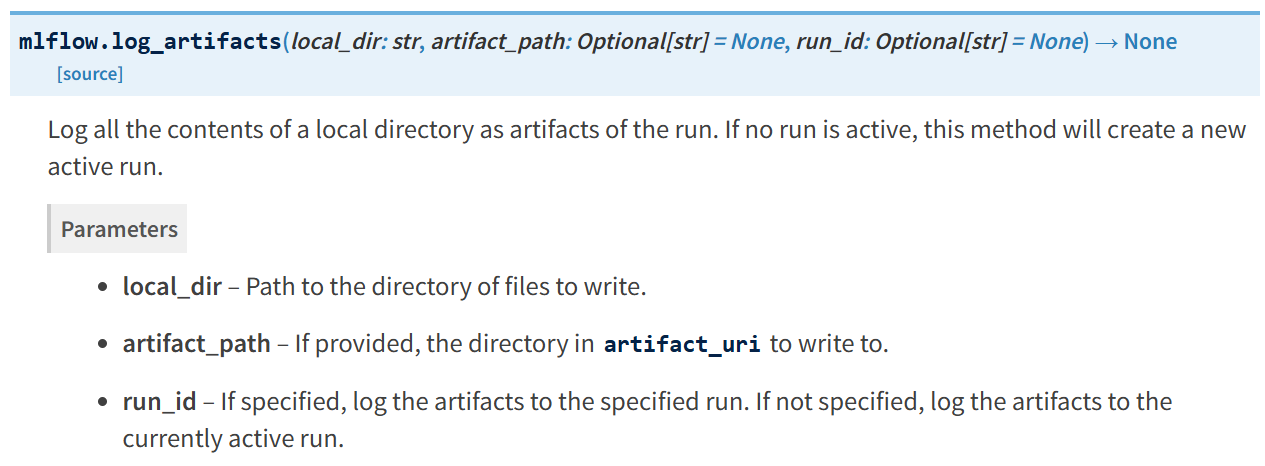

In [ ]:
# starting a run
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifacts("artifacts_example")

In [ ]:
# starting a run and providing artifact_path
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifacts("artifacts_example", artifact_path="my_artifacts")

# Log a Dictionary

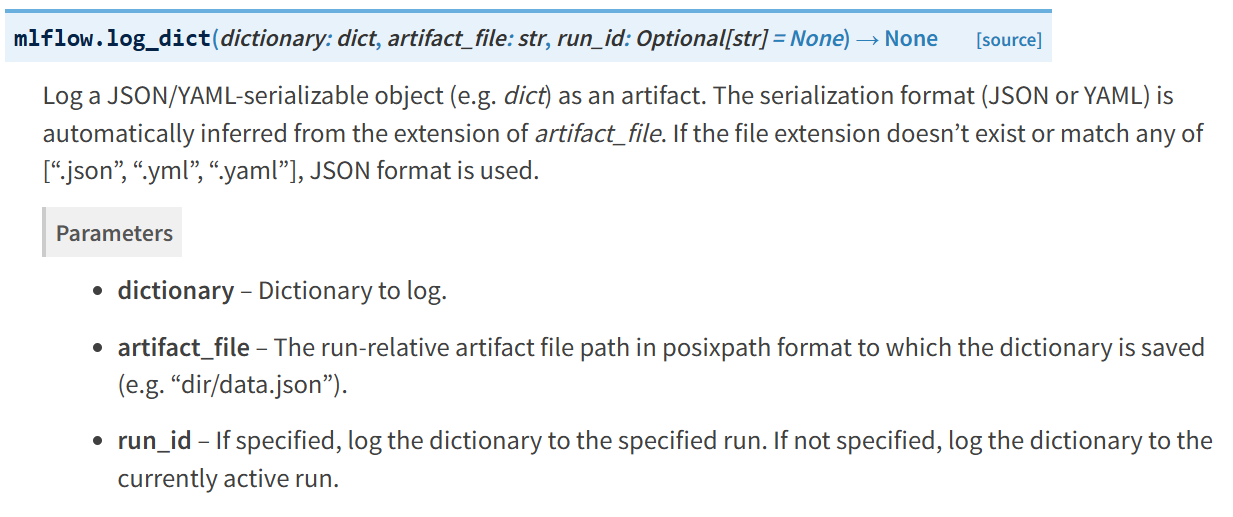

In [ ]:
# starting a run 
with mlflow.start_run(run_name="logging_artifacts") as run:
    dictionary = {
        "predictions.csv": "artifacts_example/predictions.csv",
        "model.pkl": "artifacts_example/model.pkl"
    }

    # Using json file
    mlflow.log_dict(dictionary= dictionary, artifact_file="my_files.json")

    # Using yaml file
    mlflow.log_dict(dictionary=dictionary, artifact_file="my_files.yaml")


# Log a Figure

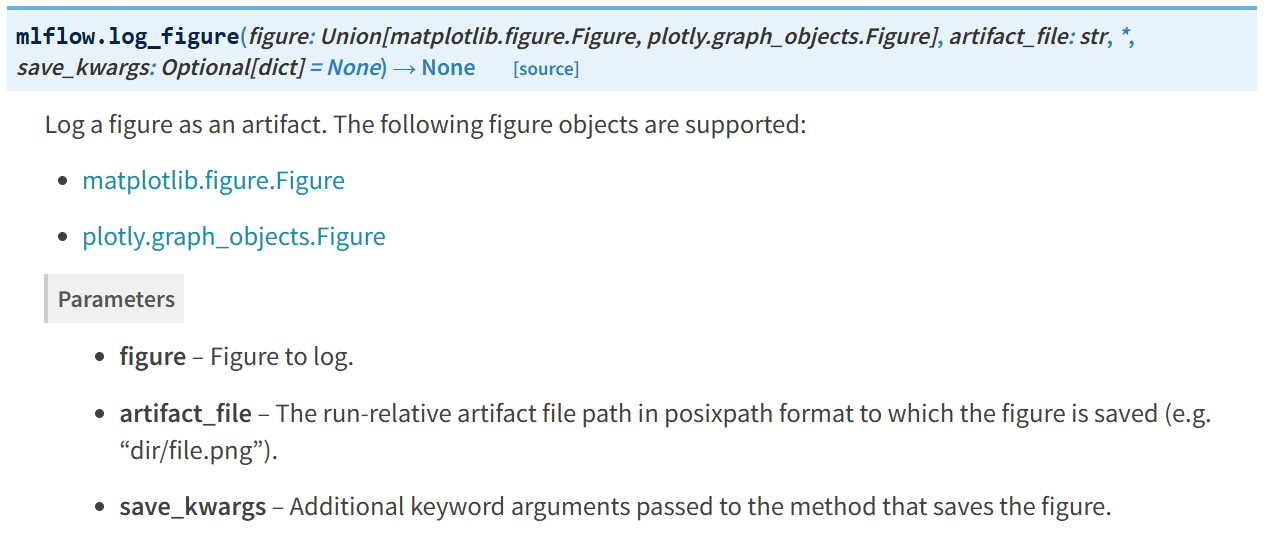

## Log a matplotlib figure

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [2, 3])


with mlflow.start_run(run_name="logging_figure") as run:
    # logging a figure
    mlflow.log_figure(fig, artifact_file="figures/figure.png")

# Log an image

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

plt.imshow(image, interpolation='nearest')
plt.show()

with mlflow.start_run(run_name="logging_image") as run:
    # logging an image
    mlflow.log_image(image, artifact_file="image.png")